Data Preview:
    MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...  DrainageSystems  Coastal

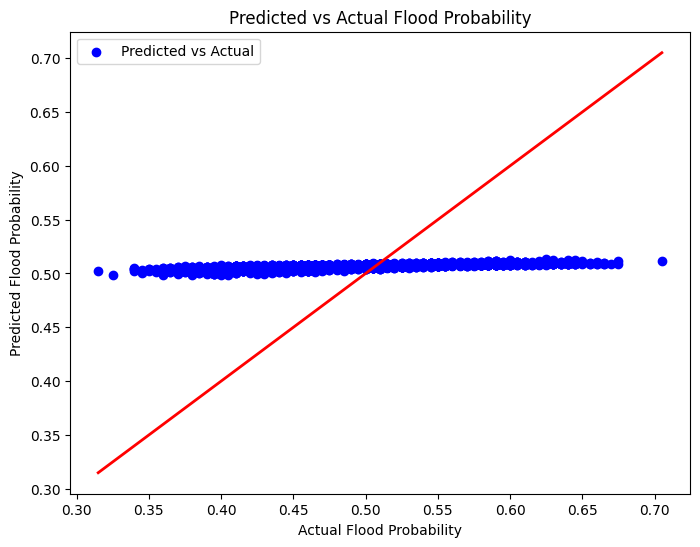

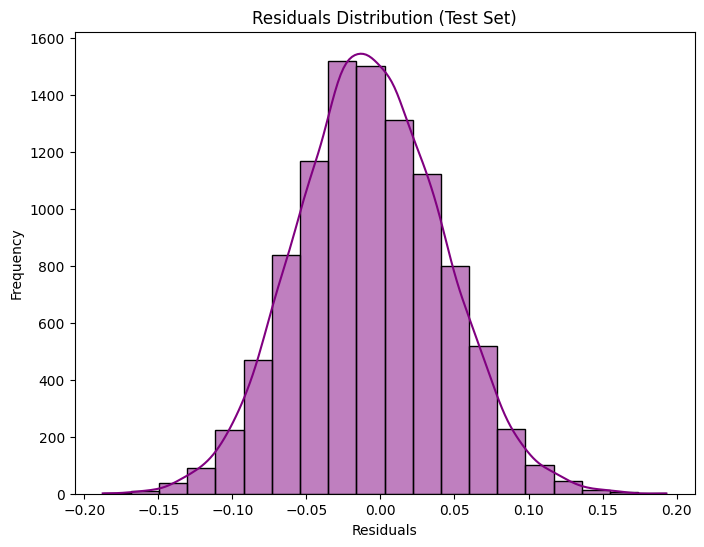

In [1]:
# 1. Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the Dataset from CSV
data = pd.read_csv('flood.csv')

# 3. Display basic information and preview
print("Data Preview:\n", data.head())
print("Data Summary:\n", data.describe())

# 4. Preprocess the Data
X = data.drop('FloodProbability', axis=1)  # Features
y = data['FloodProbability']               # Target variable

# 5. Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Initialize and Train the SVR Model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr_model.fit(X_train, y_train)

# 7. Predict and Evaluate the Model
y_pred_train = svr_model.predict(X_train)
y_pred_test = svr_model.predict(X_test)

# Mean Squared Error and R2 Score
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("\n--- SVR Model Performance ---")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training R2 Score: {train_r2:.4f}")
print(f"Testing R2 Score: {test_r2:.4f}")

# Accuracy Check: Percentage of Predictions within 10% of Actual Values
tolerance = 0.1  # 10% tolerance
accurate_predictions = np.mean(np.abs((y_test - y_pred_test) / y_test) <= tolerance) * 100
print(f"Accuracy (within 10% tolerance): {accurate_predictions:.2f}%")

# 8. Plot Predicted vs Actual Flood Probability for the Test Set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Predicted vs Actual Flood Probability')
plt.xlabel('Actual Flood Probability')
plt.ylabel('Predicted Flood Probability')
plt.legend()
plt.show()

# 9. Plot Residuals (Error Analysis)
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred_test
sns.histplot(residuals, bins=20, kde=True, color='purple')
plt.title('Residuals Distribution (Test Set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 10. Plot Feature Importance (for SVR, this is not applicable as SVR does not provide feature importance directly)
# However, you can visualize feature distributions or correlations separately if needed.
